In [14]:
!pip install torch torchvision -q
!pip install opencv-python -q
!pip install numpy -q
from google.colab.patches import cv2_imshow

import torch
import cv2
import numpy as np



In [16]:
# Load model YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-3 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [23]:
# Baca gambar
image = cv2.imread('AKU1.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [24]:
# Lakukan prediksi menggunakan YOLOv5
results = model(image)

In [25]:
# Ambil informasi objek yang terdeteksi
pred_boxes = results.pred[0][:, :4].detach().numpy()
pred_classes = results.pred[0][:, 5].detach().numpy()

In [26]:
# Loop melalui setiap objek yang terdeteksi
for box, cls in zip(pred_boxes, pred_classes):
    if cls == 0:  # Hanya mempertahankan objek dengan label wajah
        x, y, w, h = box
        cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (0, 255, 0), 2)


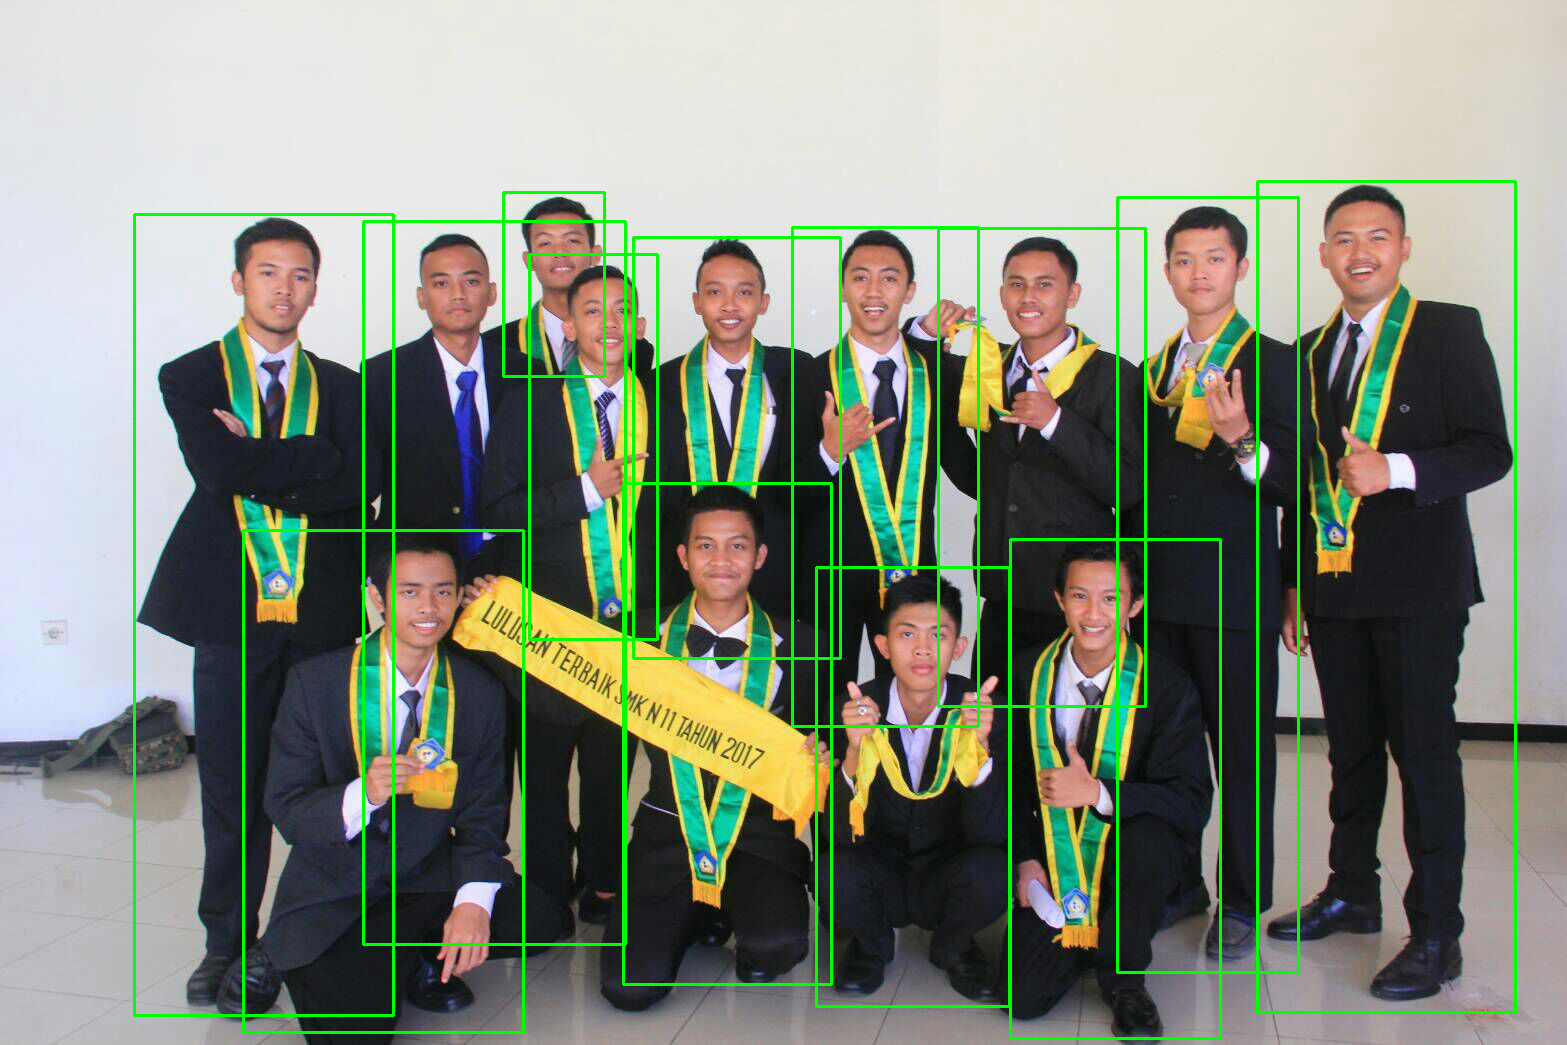

In [27]:
# Tampilkan gambar dengan kotak deteksi wajah
cv2_imshow(image)